<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2020 / 2021</h2>
    <h2>Tests</h2>
    <h3>Allgemeine Informationen:</h3>
    <p>Schreiben Sie Ihre Antwort an die Stelle <i>YOUR ANSWER HERE</i>.</p>
    <p>Wenn Sie eine Zelle bearbeiten, löschen Sie die Zeile <i>raise NotImplementedError()</i>.</p>
    <p>Fügen Sie keine neuen Zellen hinzu oder löschen Zellen.</p>
    <h3>Abgabetermin</h3>
    <p>Die Abgabe der Hausaufgabe ist immer Dienstags um <strong>12:00 Uhr mittags</strong>! Vergessen Sie nicht Ihre Übung abzugeben.</p>
    <h2>Viel Erfolg!</h2>   
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Sie müssen nicht runden. Wir testen ob Ihr Ergebnis um maximal $5\%$ vom exaktem Wert abweicht. $f_{rel }= \frac{|x_{exakt} - x_{Studi}|}{x_{exakt}} \leq 0.05$</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Benutzen Sie nur die in der nächsten Zelle angegebenen Bibliotheken mit den dort benutzten Namen. Wenn Sie also etwas aus der Bibliothek <i>random</i> nutzen wollen, verwenden Sie den Namen <i>rd</i>.</li>
        <li>Das Ergebnis einer Funktion muss mittels <i>return</i> zurückgegeben werden. Ein <i>print</i> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart & Run All. Damit führen Sie das Notebook von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die Zeilen <i>raise NotImplementedError()</i> wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
    <h3>Plots</h3>
    <ul>
        <li>Jeder Plot soll eine Achsenbeschriftung, einen Titel, eine Legende und ein Grid haben.</li>
    </ul>
    
</div>

In [9]:
import math
import collections
import itertools        
import glob
import numpy as np
import random as rd
import pandas as pd        
import matplotlib.pyplot as plt
from scipy import stats


# Gummibärchen [30 Punkte]

Sie essen gerne Gummibärchen. In einer Packung gibt es die Sorten Ananas, Himbeer, Apfel, Erdbeer, Orange und Zitrone. Jede Packung enthält ungefähr 150 Gummibärchen.

Wir interessieren uns für die Verteilung der Sorten (bspw. ob eine Sorte öfter vorkommt) und wollen diese mit einem $\chi^2$-Test überprüfen.

Dazu kaufen wir 5 Packungen Gummibärchen mit insgesamt 750 Gummibärchen.

Nach dem Zählen der Gummibärchen ergibt sich folgende Häufigkeitsverteilung:

| Farbe  | Ananas | Himbeer | Apfel | Erdbeere | Orange | Zitrone |
|--------|-----|------|------|------|--------|-------|
| Anzahl | 135  | 114   | 130  | 141  | 105    | 125    |

### Gummibärchen a) [5 Punkte]

Stellen Sie die H0-Hypothese auf.

Alle Gummibärchen kommen durchschnittlich gleich oft vor.

### Gummibärchen b) [5 Punkte]

Erstellen Sie zuerst einen pandas DataFrame mit den Spalten Sorte, Beobachtet, Erwartet.

- Die Spalte Sorte enthalte den Namen der Sorte
- Die Spalte Beobachtet enthalte die beobachtete Häufigkeit (s. Tabelle oben)
- Die Spalte Erwartet enthalte die erwartete Häufigkeit für die H0 Hypothese

Nennen Sie Ihren DataFrame ```gummibaerchen```

In [10]:
import pandas as pd

gummibaerchen = pd.DataFrame({"Sorte":["Ananas","Himbeer","Apfel","Erdbeere","Orange","Zitrone"],"Anzahl":[135,114,130,141,105,125],"Erwartet":[125]*6})
# YOUR CODE HERE
# raise NotImplementedError()
gummibaerchen

,Sorte,Anzahl,Erwartet
0,Ananas,135,125
1,Himbeer,114,125
2,Apfel,130,125
3,Erdbeere,141,125
4,Orange,105,125
5,Zitrone,125,125


### Gummibärchen c) [5 Punkte]

Rechnen Sie die Prüfgröße $\chi^2$ für den Test aus. Speichern Sie Ihre Lösung in der Variablen chi.

In [11]:
chi = sum(((x-125)**2)/125 for x in gummibaerchen["Anzahl"])
chi2 = stats.chisquare( gummibaerchen["Anzahl"], gummibaerchen["Erwartet"])
# YOUR CODE HERE
#raise NotImplementedError()
chi

7.216

### Gummibärchen d) [5 Punkte]

Benutzen Sie den $\chi^2$ Test mit einem Signifikanzniveau von $\alpha = 1 \%$ um die Hypothese anzunehmen oder abzulehnen.

Berechnen Sie die untere und obere Grenze für den Annahmebereich der H0 Hypothese.

Speichern Sie Ihre Lösung in den Variablen untereGrenze und obereGrenze.

Nehmen Sie die H0 Hypothese an? Speichern Sie Ihre Lösung als Boolean (True, False) in der Variablen ```h0angenommen```.


In [12]:
alpha = 0.01
untereGrenze = stats.norm.ppf(alpha,loc = gummibaerchen["Anzahl"].mean(),scale = gummibaerchen["Anzahl"].std(),)
obereGrenze = 1-alpha/2
h0angenommen = chi2.pvalue > untereGrenze and chi2.pvalue < obereGrenze
# YOUR CODE HERE
#raise NotImplementedError()

print('Die Grenzen für den Annahmebereich sind ({:.2f}, {:.2f})'.format(untereGrenze, obereGrenze))
if h0angenommen:
    print('Die H0 Hypothese wird angenommen')
else:
    print('Die H0 Hypothese wird abgelehnt')

Die Grenzen für den Annahmebereich sind (93.75, 0.99)
Die H0 Hypothese wird abgelehnt


In [13]:
# Dies ist eine Testzelle, bitte ignorieren Sie diese

### Gummibärchen e) [10 Punkte]

Erstellen Sie einen Plot für die Dichtefunktion der $\chi^2$ Verteilung in den Grenzen von 0 bis 20.

Zeichnen Sie die untere Grenze des Annahmebereichs und die obere Grenze des Annahmebereichs als vertikale Linie ein.

Zeichnen Sie eine vertikale Linie für die Prüfgröße.

Stellen Sie sicher, das der Wert der oberen und unteren, sowie der Prüfgröße im Plot ablesbar ist (siehe ```plt.xticks```).


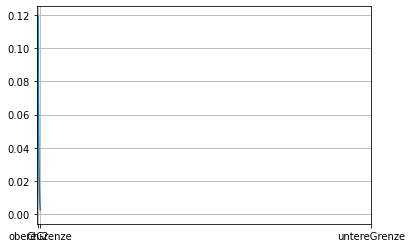

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
arr = range(21)
line = chi2.pdf(arr,chi)
plt.plot(arr,line)
plt.yticks()
plt.xticks([obereGrenze*20,untereGrenze*20,chi],["obereGrenze","untereGrenze","Chi2"])
plt.grid()
plt.show()
# YOUR CODE HERE
# raise NotImplementedError()

# TEXT für vertikale Linien (oben, unten)


# Krankheit [30 Punkte]

Ein Wissenschaftler hat verschiedene Maßnahmen gegen eine Krankheit getestet und möchte deren Wirksamkeit nun statistisch belegen.


### Krankheit a) [30 Punkte]

Implementieren Sie die Funktion ```kontingenztafel_test```, die eine Kontingenztafel erhält (bspw. Vierfeldertafel) und den Chi-Quadrat Test durchführt.

Die Funktion soll die Prüfgröße, die Anzahl der Freiheitsgerade, sowie den p-Wert zurückgeben.

Für die Anwendbarkeit des Chi-Quadrat Tests gibt es eine Faustformel. Sollte die Anwendbarkeit des Tests nicht gegeben sein, geben Sie zusätzlich eine Warnung aus. Dies können Sie mit dem Befehl ```print('Dies ist meine Warnung!')``` machen (ändern Sie den Text). 

In [15]:
from typing import Tuple
import numpy as np
from scipy.stats import chisquare, chi2

def kontingenztafel_test(kontingenztafel: [[float]]) -> Tuple[float, float, float]:
    '''
    Führe einen Chi-Quadrat-Test mit der Kontingenztafel durch
    
    Arguments:
        kontingenztafel -- Die Kontingenztafel (bspw. Vierfeldertafel)
    Returns:
        pruefgroesse    -- Die Prüfgröße des Chi-Quadrat-Tests
        freiheitsgrade  -- Die Anzahl der Freiheitsgrade
        p_Wert          -- Der aus dem Chi-Quadrat-Test ermittelte p-Wert
    '''
    pruefgroesse = 0
    p_Wert = 0
    freiheitsgrade = 0
    # YOUR CODE HERE
    raise NotImplementedError()
    
# Aufruf mit Beispiel aus der Vorlesung
pruefgroesse, freihheitsgrade, p_Wert = kontingenztafel_test([[17, 38], [18, 7]])

print(pruefgroesse, freihheitsgrade, p_Wert)

NotImplementedError: 


# Exakter Test nach Fisher [30 Punkte]

Der Fisher-Test ist ein Signifikanztest auf Unabhängigkeit in Kontingenztafeln.


### Exakter Test nach Fisher a)

Implementieren Sie den zweiseitigen Fisher-Test. Benutzen Sie hierfür nicht die Funktion ```stats.fisher_exact```!

Die Funktion ```fisher_exakt``` erhält eine Vierfeldertafel und berechnet den zugehörigen p Wert.

In [16]:
import math

def fisher_exakt(vierfeldertafel) -> float:
    '''
    Führe den zweiseitigen Fisher-Test für eine Vierfeldertafel aus
    
    Arguments:
        vierfeldertafel -- Die Vierfeldertafel
    Returns:
        p_Wert          -- Der p-Wert 
    '''
    f = math.factorial
    
    v = vierfeldertafel
    a,b,c,d = v[0][0], v[0][1], v[1][0], v[1][1]
    obenkleinstesR = int(b<a)
    untenkleinstesR = int(d<c)
    kleinster = (1,untenkleinstesR)
    if v[0][obenkleinstesR] < v[1][untenkleinstesR]:
        kleinster = (0,obenkleinstesR)
    p_Wert = 0
    p_Wertx = f(a+b)*f(c+d)*f(a+c)*f(b+d)/(f(a+b+c+d)*f(a)*f(b)*f(c)*f(d))
    """for i in range(v[kleinster[0]][kleinster[1]]+1):
        if kleinster[0]==kleinster[1]:
            a,b,c,d = v[0][0]-i, v[1][0]+i, v[0][1]+i, v[1][1]-i
        else:
            a,b,c,d = v[0][0]+i, v[1][0]-i, v[0][1]-i, v[1][1]+i
        x = f(a+b)*f(c+d)*f(a+c)*f(b+d)/(f(a+b+c+d)*f(a)*f(b)*f(c)*f(d))
        print("",a,c,"\n",b,d,"\n",x)
        p_Wertx += x"""
        
    otherlow = (0,1)
    if v[1][0] < v[0][1]: otherlow = (1,0) 
    if kleinster[0]!=kleinster[1]:
        if v[1][1] < v[0][0]: otherlow = (1,1) 
        else: otherlow = (0,0)
            
    j = v[otherlow[0]][otherlow[1]]
    """
    for i in range(v[otherlow[0]][otherlow[1]]+1):
        if otherlow[0]==otherlow[1]:
            a,b,c,d = v[0][0]-i, v[1][0]+i, v[0][1]+i, v[1][1]-i
        else:
            a,b,c,d = v[0][0]+i, v[1][0]-i, v[0][1]-i, v[1][1]+i
        print("",a,c,"\n",b,d)
        arr.append(f(a+b)*f(c+d)*f(a+c)*f(b+d)/(f(a+b+c+d)*f(a)*f(b)*f(c)*f(d)))
    p_Wert += sum(arr[::-1][:v[kleinster[0]][kleinster[1]]])
    
    """
    
    
    for i in range(v[kleinster[0]][kleinster[1]]+j+1):
        
        if otherlow[0]==otherlow[1]:
            a,b,c,d = v[0][0]+i-j, v[1][0]-i+j, v[0][1]-i+j, v[1][1]+i-j
        else:
            a,b,c,d = v[0][0]-i+j, v[1][0]+i-j, v[0][1]+i-j, v[1][1]-i+j
        x = f(a+b)*f(c+d)*f(a+c)*f(b+d)/(f(a+b+c+d)*f(a)*f(b)*f(c)*f(d))
        if p_Wertx >= x:
            print(x)
            p_Wert += x
    return p_Wert

# YOUR CODE HERE
#raise NotImplementedError()

    
vierfeldertafel = [[4, 1], 
                   [2, 2]]

fisher_exakt(vierfeldertafel), stats.fisher_exact(vierfeldertafel)

0.11904761904761904
0.35714285714285715
0.047619047619047616


(0.5238095238095237, (4.0, 0.5238095238095241))